In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jun 29 20:22:45 2019

@author: mor
"""

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [2]:

pd.set_option('display.max_columns', 8)



In [3]:

average_ests=pd.read_csv('data/average_ests.csv')



C:\Users\mor\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


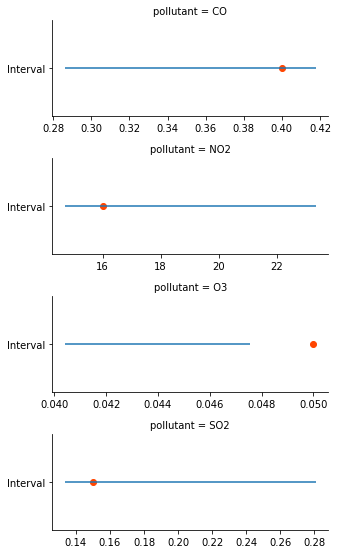

In [4]:


# Construct CI bounds for averages
average_ests['lower'] = average_ests['mean'] - 1.96*average_ests['std_err']
average_ests['upper'] = average_ests['mean'] + 1.96*average_ests['std_err']

# Setup a grid of plots, with non-shared x axes limits
g = sns.FacetGrid(average_ests, row = 'pollutant', sharex = False,size=2, aspect=2.5)

# Plot CI for average estimate
g.map(plt.hlines, 'y', 'lower', 'upper')

# Plot observed values for comparison and remove axes labels
g.map(plt.scatter, 'seen', 'y', color = 'orangered').set_ylabels('').set_xlabels('') 

plt.show()



In [5]:


diffs_by_year=pd.read_csv('data/diffs_by_year.csv')



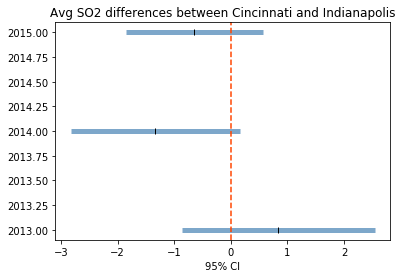

In [6]:

# Set start and ends according to intervals 
# Make intervals thicker
plt.hlines(y = 'year', xmin = 'lower', xmax = 'upper', 
           linewidth = 5, color = 'steelblue', alpha = 0.7,
           data = diffs_by_year)
# Point estimates
plt.plot('mean', 'year', 'k|', data = diffs_by_year)

# Add a 'null' reference line at 0 and color orangered
plt.axvline(x = 0, color = 'orangered', linestyle = '--')

# Set descriptive axis labels and title
plt.xlabel('95% CI')
plt.title('Avg SO2 differences between Cincinnati and Indianapolis')
plt.show()



In [7]:


# =============================================================================
# example of dealing with llst inside pandas series
# =============================================================================
#diffs_by_year['li']=diffs_by_year.apply(lambda row: [row['year'],row['mean']],axis=1)
#diffs_by_year['li'].apply(pd.Series)



In [8]:


vandenberg_NO2=pd.read_csv('data/vandenberg_NO2.csv')



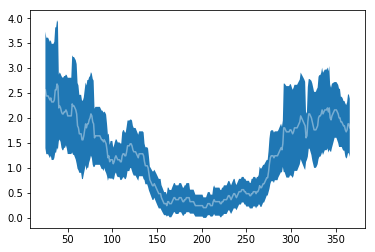

In [9]:

# Draw 99% inverval bands for average NO2
vandenberg_NO2['lower'] = vandenberg_NO2['mean'] - 2.58*vandenberg_NO2['std_err']
vandenberg_NO2['upper'] = vandenberg_NO2['mean'] + 2.58*vandenberg_NO2['std_err']

# Plot mean estimate as a white semi-transparent line
plt.plot('day', 'mean', data = vandenberg_NO2,
         color = 'white', alpha = 0.4)

# Fill between the upper and lower confidence band values
plt.fill_between(x = 'day', 
                 y1 = 'lower', y2 = 'upper', 
                 data = vandenberg_NO2)

plt.show()



In [10]:


eastern_SO2=pd.read_csv('data/eastern_SO2.csv')



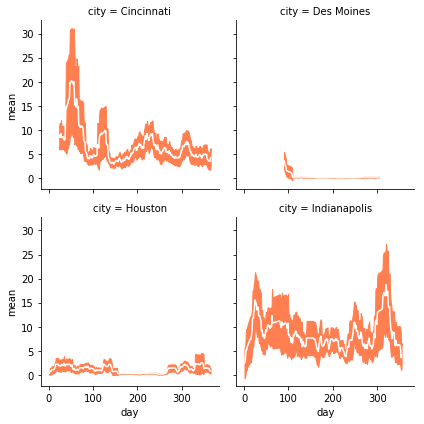

In [11]:

# Setup a grid of plots with columns divided by location
g = sns.FacetGrid(eastern_SO2, col = 'city', col_wrap = 2)

# Map interval plots to each cities data with corol colored ribbons
g.map(plt.fill_between, 'day', 'lower', 'upper', color = 'coral')

# Map overlaid mean plots with white line
g.map(plt.plot, 'day', 'mean', color = 'white')
plt.tight_layout()
plt.show()




In [12]:


SO2_compare=pd.read_csv('data/SO2_compare.csv')



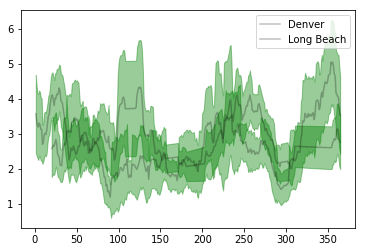

In [13]:

for city, color in [('Denver',"#66c2a5"), ('Long Beach', "#fc8d62")]:
    # Filter data to desired city
    city_data = SO2_compare[SO2_compare.city  ==  city]

    # Set city interval color to desired and lower opacity
    plt.fill_between(x = 'day', y1 = 'lower', y2 = 'upper', data = city_data,
                     color = 'green', alpha = 0.4)
    
    # Draw a faint mean line for reference and give a label for legend
    plt.plot('day','mean', data = city_data, label = city,
             color = 'black', alpha = 0.25)

plt.legend()
plt.show()




In [14]:

#class for added model data
class Pollution_Model:
    path = 'data/pollution_model_{}.csv'
    params=None
    
    def __init__(self):
        path=self.path.format('params')
        self.params=pd.read_csv(path,index_col=0,header=None).squeeze()
        
    def conf_int(self,alpha):
        path=self.path.format('alpha_'+str(alpha))
        return pd.read_csv(path,index_col=0,names=[0,1],header=0)
  
pollution_model=Pollution_Model()


               0          1
const   2.756768   7.781215
day    -3.497728   0.894893
CO     27.881130  40.958220
NO2     8.329289  16.630871
O3     -6.668235  -0.485572
               0          1
const   3.360161   7.177822
day    -2.970212   0.367377
CO     29.451576  39.387774
NO2     9.326237  15.633923
O3     -5.925751  -1.228057
               0          1
const   3.667982   6.870001
day    -2.701099   0.098265
CO     30.252740  38.586610
NO2     9.834831  15.125329
O3     -5.546972  -1.606836


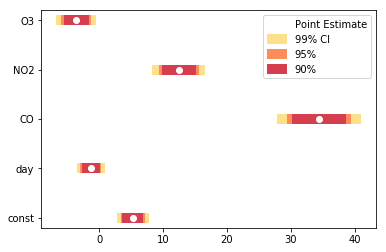

In [15]:


# Add interval percent widths
alphas = [     0.01,  0.05,   0.1] 
widths = [ '99% CI', '95%', '90%']
colors = ['#fee08b','#fc8d59','#d53e4f']

for alpha, color, width in zip(alphas, colors, widths):
    # Grab confidence interval
    conf_ints = pollution_model.conf_int(alpha)
    print(conf_ints)
    #Pass current interval color and legend label to plot
    plt.hlines(y = conf_ints.index, xmin = conf_ints[0], xmax = conf_ints[1],
               colors = color, label = width, linewidth = 10) 

# Draw point estimates
plt.plot(pollution_model.params, pollution_model.params.index, 'wo', label = 'Point Estimate')

plt.legend()
plt.show() 



In [16]:

cinci_13_no2=pd.read_csv('data/cinci_13_no2.csv')



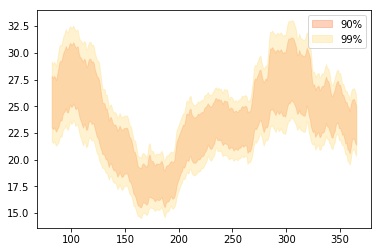

In [17]:

int_widths = ['90%', '99%']
z_scores = [1.67, 2.58]
colors = ['#fc8d59', '#fee08b']

for percent, Z, color in zip(int_widths, z_scores, colors):
    
    # Pass lower and upper confidence bounds and lower opacity
    plt.fill_between(
        x = cinci_13_no2.day, alpha = 0.4, color = color,
        y1 = cinci_13_no2['mean'] - Z*cinci_13_no2['std_err'],
        y2 = cinci_13_no2['mean'] + Z*cinci_13_no2['std_err'],
        label = percent)
    
plt.legend()
plt.show()



In [18]:


rocket_model=pd.read_csv('data/rocket_model.csv')



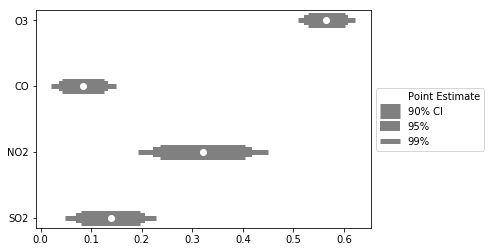

In [19]:


# Decrase interval thickness as interval widens
sizes =      [    15,  10,  5]
int_widths = ['90% CI', '95%', '99%']
z_scores =   [    1.67,  1.96,  2.58]

for percent, Z, size in zip(int_widths, z_scores, sizes):
    plt.hlines(y = rocket_model.pollutant, 
               xmin = rocket_model['est'] - Z*rocket_model['std_err'],
               xmax = rocket_model['est'] + Z*rocket_model['std_err'],
               label = percent, 
               # Resize lines and color them gray
               linewidth = size, 
               color = 'gray') 
    
# Add point estimate
plt.plot('est', 'pollutant', 'wo', data = rocket_model, label = 'Point Estimate')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()



In [20]:

bootstrap = lambda data, n_boots: np.array([np.mean(np.random.choice(data,len(data))) for _ in range(n_boots)])



In [21]:

pollution=pd.read_csv('data/pollution.csv').drop('state',axis=1)



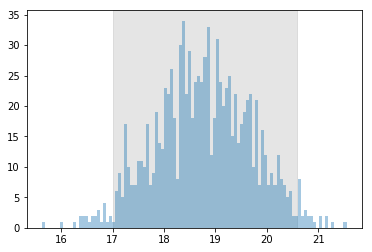

In [22]:


cinci_may_NO2 = pollution.query("city  ==  'Cincinnati' & month  ==  5").NO2

# Generate bootstrap samples
boot_means = bootstrap(cinci_may_NO2, 1000)

# Get lower and upper 95% interval bounds
lower, upper = np.percentile(boot_means, [2.5, 97.5])

# Plot shaded area for interval
plt.axvspan(lower, upper, color = 'gray', alpha = 0.2)

# Draw histogram of bootstrap samples
sns.distplot(boot_means, bins= 100, kde = False)

plt.show()



In [23]:

no2_so2=pd.read_csv('data/no2_so2.csv',index_col=0)
no2_so2_boot=pd.read_csv('data/no2_so2_boot.csv',index_col=0)



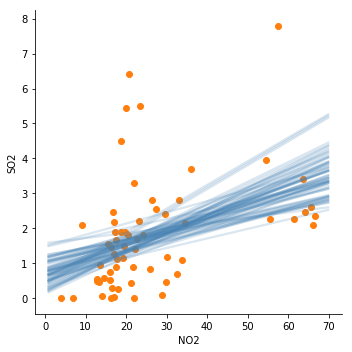

In [24]:


sns.lmplot('NO2', 'SO2', data = no2_so2_boot,
           # Tell seaborn to a regression line for each sample
           hue = 'sample', 
           # Make lines blue and transparent
           line_kws = {'color': 'steelblue', 'alpha': 0.2},
           # Disable built-in confidence intervals
           ci = None, legend = False, scatter = False)

# Draw scatter of all points
plt.scatter('NO2', 'SO2', data = no2_so2)

plt.show()



In [25]:


pollution_may=pollution.query(" month  ==  5")



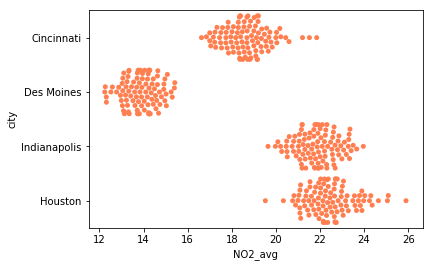

In [26]:


# Initialize a holder DataFrame for bootstrap results
city_boots = pd.DataFrame()

for city in ['Cincinnati', 'Des Moines', 'Indianapolis', 'Houston']:
    # Filter to city
    city_NO2 = pollution_may[pollution_may.city  ==  city].NO2
    # Bootstrap city data & put in DataFrame
    cur_boot = pd.DataFrame({'NO2_avg': bootstrap(city_NO2, 100), 'city': city})
    # Append to other city's bootstraps
    city_boots = pd.concat([city_boots,cur_boot])

# Beeswarm plot of averages with citys on y axis
sns.swarmplot(y = "city", x = "NO2_avg", data = city_boots, color = 'coral')

plt.show()